In [3]:
# Importing standard libraries
import os
import warnings

# Importing third-party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from scipy.stats import skew, kurtosis, ttest_ind
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,
    mean_squared_error,
    mean_squared_log_error,
    r2_score,
    classification_report,
    accuracy_score,
    roc_auc_score
)
import joblib
from dotenv import dotenv_values
import pyodbc  # Database connection, use only if needed
import requests  # HTTP requests, use only if needed

# Configure Pandas display options for better readability
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# Selectively suppress specific warnings instead of all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Set up visualization style
sns.set(style="whitegrid")
plt.style.use("ggplot")


In [4]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("server")
database = environment_variables.get("database")
username = environment_variables.get("Login")
password = environment_variables.get("password")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"


# Use the pyodbc library to pass in the connection string.
connection = pyodbc.connect(connection_string)

In [5]:
# SQL query to fetch all data from the specified table
query = "SELECT * FROM dbo.LP2_Telco_churn_first_3000"

# log the query for debugging
print("SQL query prepared for data retrieval.")


SQL query prepared for data retrieval.


In [6]:
try:
    # Execute the query and fetch data into a DataFrame
    test_1 = pd.read_sql(query, connection)
    print("Data successfully retrieved from the database.")
    
    # Preview the first few rows of the DataFrame
    display(test_1.head())
except Exception as e:
    print(f"An error occurred while retrieving data: {e}")
    raise
finally:
    # Ensure the database connection is closed
    connection.close()
    print("Database connection closed.")


C:\Users\Safowaa\AppData\Local\Temp\ipykernel_11144\3997932428.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  test_1 = pd.read_sql(query, connection)


Data successfully retrieved from the database.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


Database connection closed.


In [7]:
try:
    # Read the CSV file into a DataFrame
    test_2 = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\LP2_Telco-churn-second-2000.csv")
    print("CSV file successfully read into a DataFrame.")
    
    # Preview the first few rows of the DataFrame
    display(test_2.head())
except FileNotFoundError:
    print("The specified CSV file was not found.")
except pd.errors.EmptyDataError:
    print("The CSV file is empty.")
except pd.errors.ParserError:
    print("Error parsing the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    raise


CSV file successfully read into a DataFrame.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [8]:
# Close the database connection if it's still open
if not connection.closed:
    connection.close()
    print("Database connection closed.")


In [9]:
try:
    # Ensure both DataFrames have the same columns before concatenation
    if list(test_1.columns) != list(test_2.columns):
        raise ValueError("The DataFrames do not have the same columns and cannot be concatenated.")
    
    # Concatenate the DataFrames
    train_data = pd.concat([test_1, test_2], ignore_index=True)
    print("DataFrames successfully concatenated.")
    
    # Save the concatenated DataFrame to a CSV file
    output_file = r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\train_data.csv"
    if os.path.exists(output_file):
        print(f"Warning: {output_file} will be overwritten.")
    
    train_data.to_csv(output_file, index=False)
    print(f"Concatenated data saved to {output_file}.")
except Exception as e:
    print(f"An error occurred during concatenation or file saving: {e}")
    raise

DataFrames successfully concatenated.
Concatenated data saved to C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\train_data.csv.


Summary of missing values in each column:
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


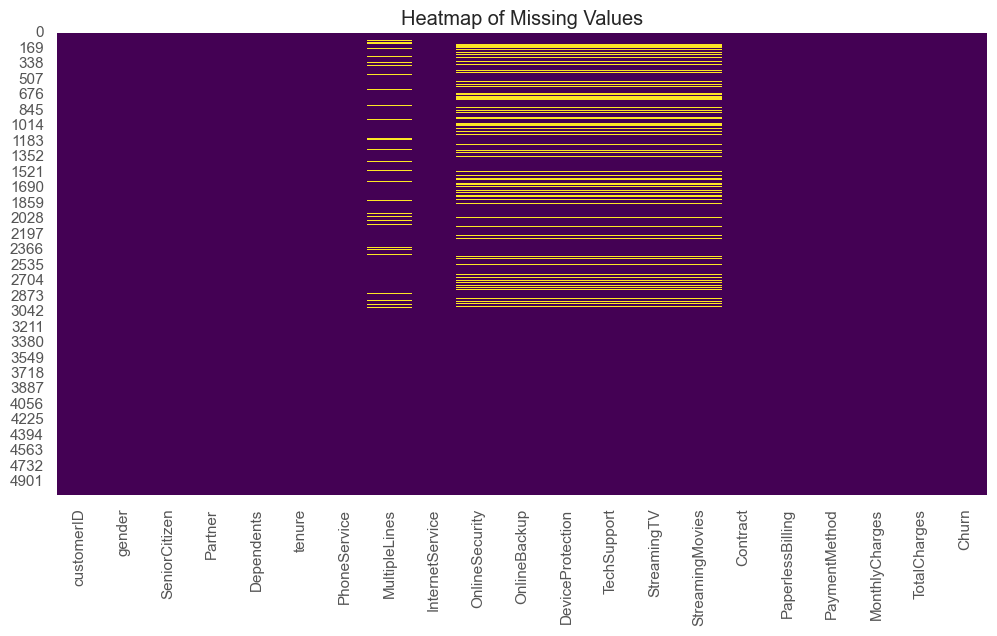

In [10]:
# Checking for missing values in the DataFrame
missing_values = train_data.isnull().sum()

# Print a summary of missing values
print("Summary of missing values in each column:")
print(missing_values)

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()

In [11]:
# Handling missing values by filling numerical columns with the median and categorical with the mode
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        # Fill missing categorical values with the mode (most frequent value)
        mode_value = train_data[column].mode()[0]
        train_data[column].fillna(mode_value, inplace=True)
        print(f"Filled missing values in '{column}' with mode: {mode_value}")
    else:
        # Fill missing numerical values with the median
        median_value = train_data[column].median()
        train_data[column].fillna(median_value, inplace=True)
        print(f"Filled missing values in '{column}' with median: {median_value}")

Filled missing values in 'customerID' with mode: 0002-ORFBO
Filled missing values in 'gender' with mode: Male
Filled missing values in 'SeniorCitizen' with median: 0.0
Filled missing values in 'Partner' with mode: False
Filled missing values in 'Dependents' with mode: False
Filled missing values in 'tenure' with median: 29.0
Filled missing values in 'PhoneService' with mode: True
Filled missing values in 'MultipleLines' with mode: False
Filled missing values in 'InternetService' with mode: Fiber optic
Filled missing values in 'OnlineSecurity' with mode: False
Filled missing values in 'OnlineBackup' with mode: False
Filled missing values in 'DeviceProtection' with mode: False
Filled missing values in 'TechSupport' with mode: False
Filled missing values in 'StreamingTV' with mode: False
Filled missing values in 'StreamingMovies' with mode: True
Filled missing values in 'Contract' with mode: Month-to-month
Filled missing values in 'PaperlessBilling' with mode: True
Filled missing values i

C:\Users\Safowaa\AppData\Local\Temp\ipykernel_11144\1779085206.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna(mode_value, inplace=True)
C:\Users\Safowaa\AppData\Local\Temp\ipykernel_11144\1779085206.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [12]:
# Verify that there are no more missing values in the DataFrame
missing_values_after = train_data.isnull().sum()
print("\nMissing values after handling:\n", missing_values_after)

# Optional: Assert that all missing values have been handled
assert missing_values_after.sum() == 0, "There are still missing values in the dataset!"

# Final check: Provide a summary of the DataFrame after handling missing values
print("\nDataFrame summary after handling missing values:")
print(train_data.info())


Missing values after handling:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

DataFrame summary after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   t

In [13]:
# Checking for duplicate rows in the DataFrame
duplicates = train_data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# If duplicates exist, decide how to handle them (e.g., remove them)
if duplicates > 0:
    print("Removing duplicate rows...")
    train_data.drop_duplicates(inplace=True)
    print(f"Number of rows after removing duplicates: {train_data.shape[0]}")
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


In [14]:
# Getting a comprehensive summary of the DataFrame
print("DataFrame structure and summary:")
train_data.info()

# Optional: Include a statistical summary for numerical columns
print("\nStatistical summary for numerical columns:")
print(train_data.describe())

# Optional: Display the first few rows of the DataFrame for a quick inspection
print("\nPreview of the first few rows of the DataFrame:")
display(train_data.head())

DataFrame structure and summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     5043 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    5043 non-null   object 
 10  OnlineBackup      5043 non-null   object 
 11  DeviceProtection  5043 non-null   object 
 12  TechSupport       5043 non-null   object 
 13  StreamingTV       5043 non-null   object 
 14  StreamingMovies   5043 non-null   object 
 15  Contract          5043 non-null   object 
 16  Paperless

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,False,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,False,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [15]:
# Randomly sample 15 rows from the DataFrame for inspection
sample_data = train_data.sample(15, random_state=42)  # Setting random_state for reproducibility
print("Random sample of 15 rows from the DataFrame:")
display(sample_data)

Random sample of 15 rows from the DataFrame:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4943,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.500000,30.5,Yes
1919,3946-MHCZW,Male,0,False,False,1,True,False,DSL,False,False,True,False,False,False,Month-to-month,False,Mailed check,50.900002,50.900002,True
1049,8329-IBCTI,Female,0,False,False,1,True,False,No,False,False,False,False,False,True,Month-to-month,False,Mailed check,19.650000,19.65,True
4697,8080-POTJR,Female,0,No,No,30,Yes,Yes,DSL,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),79.300000,2427.1,No
3312,9564-KCLHR,Male,0,No,No,1,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,No,Mailed check,51.250000,51.25,Yes
4387,9853-JFZDU,Female,0,Yes,No,35,Yes,No,DSL,No,Yes,No,Yes,No,No,Month-to-month,No,Electronic check,56.850000,1861.1,No
240,7301-ABVAD,Female,0,False,False,72,True,True,DSL,False,True,True,True,True,True,Two year,False,Bank transfer (automatic),86.599998,6350.5,False
4064,7568-PODML,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,45.300000,45.3,Yes
2702,1942-OQFRW,Male,0,False,False,1,True,False,DSL,False,False,False,False,False,False,Month-to-month,False,Electronic check,44.000000,44.0,False
239,9227-UAQFT,Male,0,False,False,16,True,False,No,False,False,False,False,False,True,Two year,False,Mailed check,19.750000,284.350006,False


In [16]:
# Converting 'TotalCharges' to numeric, coercing errors to NaN
train_data['TotalCharges'] = pd.to_numeric(train_data['TotalCharges'], errors='coerce')

# Dropping rows where 'TotalCharges' could not be converted (i.e., where NaN exists)
initial_row_count = train_data.shape[0]
train_data.dropna(subset=['TotalCharges'], inplace=True)
final_row_count = train_data.shape[0]

print(f"Converted 'TotalCharges' to numeric. Dropped {initial_row_count - final_row_count} rows with NaN values.")

Converted 'TotalCharges' to numeric. Dropped 3 rows with NaN values.


In [17]:
# Get a statistical summary of the numerical columns, transposed for readability
print("Statistical summary of numerical columns:")
numerical_summary = train_data.describe().T
display(numerical_summary)

Statistical summary of numerical columns:


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5040.0,0.162500,0.368945,0.000000,0.000000,0.000000,0.000000,1.000000
tenure,5040.0,32.596032,24.524223,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,5040.0,65.098214,30.070025,18.400000,35.787499,70.575001,90.050003,118.650002
TotalCharges,5040.0,2299.799108,2269.494764,18.799999,416.212503,1399.949988,3858.900024,8670.100000


In [18]:
# Check and print the shape of the DataFrame
data_shape = train_data.shape
print(f"The DataFrame contains {data_shape[0]} rows and {data_shape[1]} columns.")

The DataFrame contains 5040 rows and 21 columns.


In [19]:
# Display the column names of the DataFrame
print("The DataFrame contains the following columns:")
column_names = train_data.columns.values
print(column_names)

The DataFrame contains the following columns:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']


In [20]:
# Transforming the 'Churn' column to a binary integer format (1 for Yes, 0 for No)
train_data['Churn'] = train_data['Churn'].replace({True: 'Yes', False: 'No'}).fillna('No')
train_data['Churn'] = train_data['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)

# Confirming the transformation
print("Churn column transformed to binary integer format:")
print(train_data['Churn'].value_counts())

Churn column transformed to binary integer format:
Churn
0    3704
1    1336
Name: count, dtype: int64


C:\Users\Safowaa\AppData\Local\Temp\ipykernel_11144\4063169011.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['Churn'] = train_data['Churn'].replace({'Yes': 1, 'No': 0}).astype(int)


In [21]:
# Save the transformed dataset back to a CSV file
output_file = r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\train_data.csv"

if os.path.exists(output_file):
    print(f"Warning: {output_file} will be overwritten.")

train_data.to_csv(output_file, index=False)
print(f"Transformed dataset saved to {output_file}.")


Transformed dataset saved to C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\train_data.csv.


In [22]:
# Inspect the unique values in the 'PaperlessBilling' column
print("Unique values in the 'PaperlessBilling' column:")
unique_values = train_data["PaperlessBilling"].unique()
print(unique_values)

Unique values in the 'PaperlessBilling' column:
[True False 'Yes' 'No']


In [23]:
# Display the first few rows of the transformed dataset to verify the changes
print("Preview of the transformed dataset:")
display(train_data.head())

Preview of the transformed dataset:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,False,DSL,False,True,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,0
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,False,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,0
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,True,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,1
3,7795-CFOCW,Male,0,False,False,45,False,False,DSL,True,False,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,0
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,False,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,1


In [24]:
# Finding the value counts in the 'Churn' column
print("Value counts for the 'Churn' column:")
churn_counts = train_data["Churn"].value_counts()
print(churn_counts)

# Optional: Calculate and display the percentage distribution
churn_percentage = churn_counts / churn_counts.sum() * 100
print("\nPercentage distribution of 'Churn':")
print(churn_percentage)

Value counts for the 'Churn' column:
Churn
0    3704
1    1336
Name: count, dtype: int64

Percentage distribution of 'Churn':
Churn
0    73.492063
1    26.507937
Name: count, dtype: float64


In [25]:
# Calculate churn ratio to gain insights into the 'Churn' column
churn_ratio = 100 * train_data['Churn'].value_counts() / len(train_data['Churn'])

# Format and print the churn ratio
churn_ratio_output = (
    f"Churn Ratio:\n"
    f"0 (No): {churn_ratio[0]:.2f}%\n"
    f"1 (Yes): {churn_ratio[1]:.2f}%"
)
print(churn_ratio_output)

Churn Ratio:
0 (No): 73.49%
1 (Yes): 26.51%


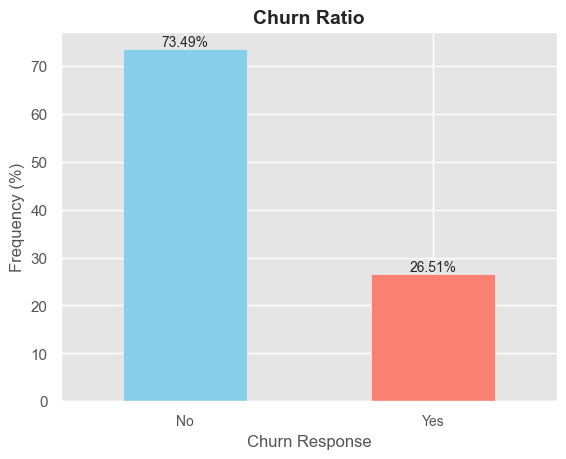

In [26]:
# Plotting the churn ratio as a bar chart
fig, ax = plt.subplots()
churn_ratio.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])

# Enhancing the plot's appearance
ax.set_title('Churn Ratio', fontsize=14, fontweight='bold')
ax.set_xlabel('Churn Response', fontsize=12)
ax.set_ylabel('Frequency (%)', fontsize=12)
ax.set_xticklabels(['No', 'Yes'], rotation=0, fontsize=10)
ax.bar_label(ax.containers[0], fmt='%.2f%%')  # Adding labels on top of bars

# Display the plot
plt.show()

In [27]:
# Counting the number of males and females who churned
churn_counts = train_data[train_data['Churn'] == 1]['gender'].value_counts()

# Display the results with clear labels
print("Number of customers who churned by gender:")
print(churn_counts)

Number of customers who churned by gender:
gender
Male      675
Female    661
Name: count, dtype: int64


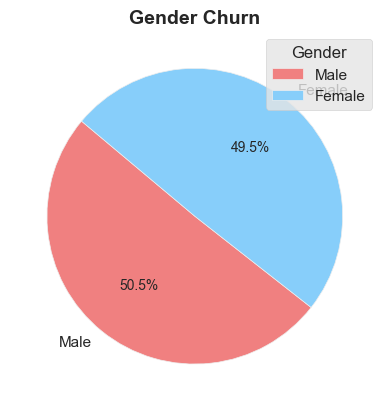

In [28]:
# Plotting the gender churn as a pie chart
fig, ax = plt.subplots()
colors = ['lightcoral', 'lightskyblue']
churn_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=ax, startangle=140)

# Enhancing the plot's appearance
ax.set_title('Gender Churn', fontsize=14, fontweight='bold')
ax.set_ylabel('')  # Remove the y-label for better appearance
ax.legend(labels=churn_counts.index, loc='upper right', title="Gender")

# Display the plot
plt.show()

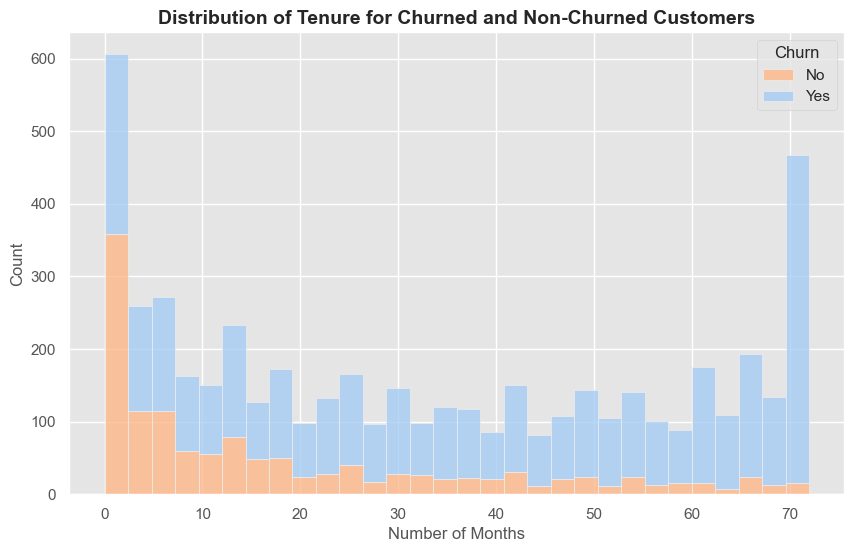

Average tenure for churned and non-churned customers:
Churn
0    37.773488
1    18.241766
Name: tenure, dtype: float64


In [29]:
# Plotting the distribution of tenure for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='tenure', hue='Churn', multiple='stack', bins=30, palette='pastel')

# Enhancing the plot's appearance
plt.title('Distribution of Tenure for Churned and Non-Churned Customers', fontsize=14, fontweight='bold')
plt.xlabel('Number of Months', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Calculating and displaying the average tenure for churned and non-churned customers
avg_tenure = train_data.groupby('Churn')['tenure'].mean()
print("Average tenure for churned and non-churned customers:")
print(avg_tenure)

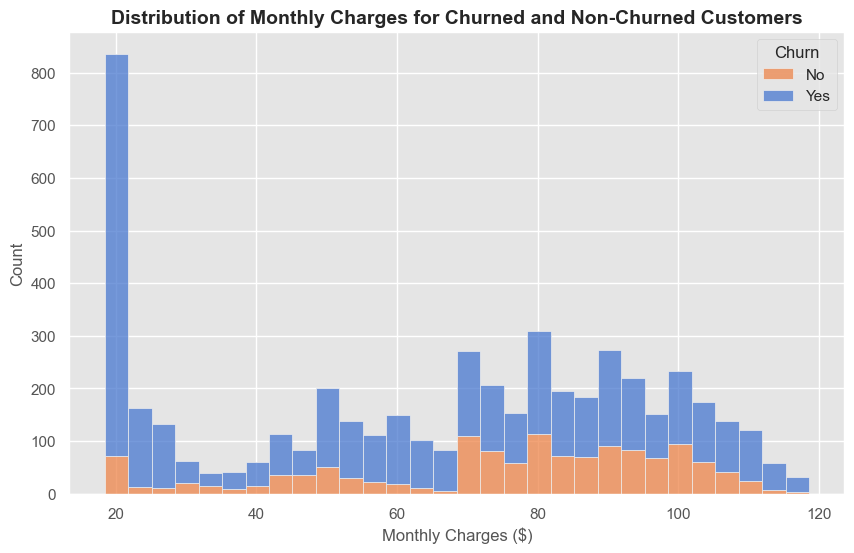

Average monthly charges for churned and non-churned customers:
Churn
0    61.450621
1    75.211003
Name: MonthlyCharges, dtype: float64


In [30]:
# Plotting the distribution of monthly charges for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, palette='muted')

# Enhancing the plot's appearance
plt.title('Distribution of Monthly Charges for Churned and Non-Churned Customers', fontsize=14, fontweight='bold')
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

# Calculating and displaying the average monthly charges for churned and non-churned customers
avg_monthly_charges = train_data.groupby('Churn')['MonthlyCharges'].mean()
print("Average monthly charges for churned and non-churned customers:")
print(avg_monthly_charges)

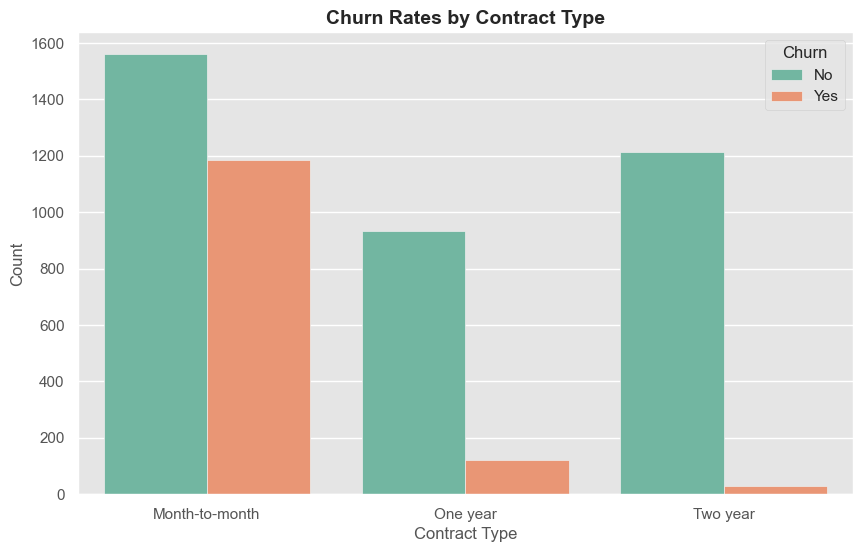

In [31]:
# Creating bar plots showing churn rates for different contract types
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Contract', hue='Churn', palette='Set2')

# Enhancing the plot's appearance
plt.title('Churn Rates by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.xticks(rotation=0)  # Ensuring x-axis labels are horizontal for better readability

# Display the plot
plt.show()

C:\Users\Safowaa\AppData\Local\Temp\ipykernel_11144\2442560400.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Contract', y='MonthlyCharges', data=train_data, palette='coolwarm')


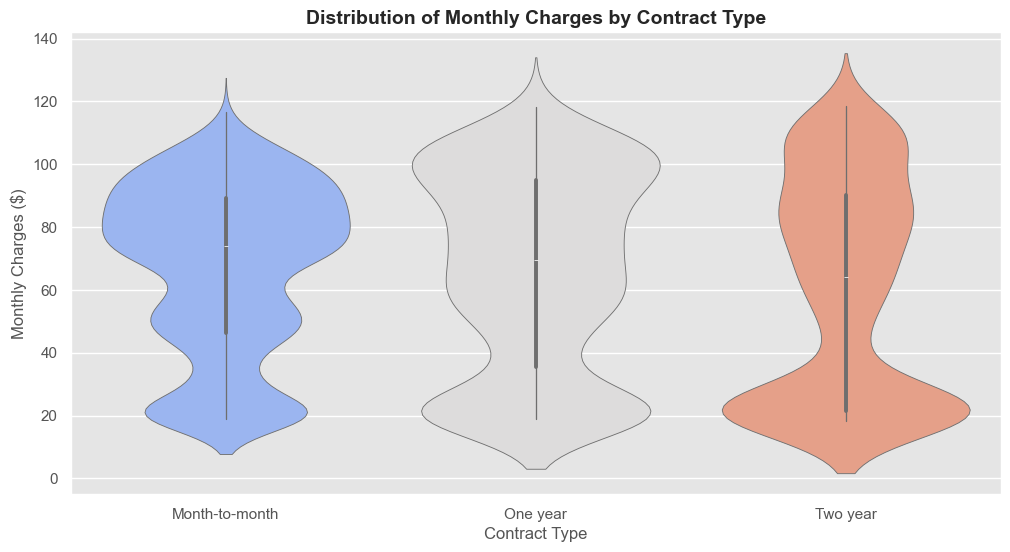

In [32]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the violin plot to show distribution of Monthly Charges by Contract Type
sns.violinplot(x='Contract', y='MonthlyCharges', data=train_data, palette='coolwarm')

# Enhancing the plot's appearance
plt.title('Distribution of Monthly Charges by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)

# Display the plot
plt.show()

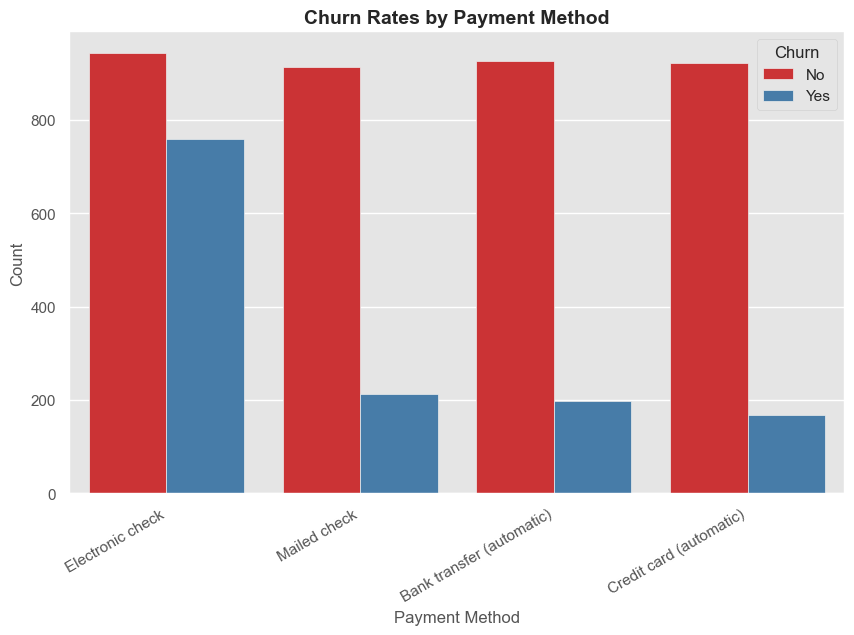

In [33]:
# Analyzing how payment methods impact churn by creating bar plots
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='PaymentMethod', hue='Churn', palette='Set1')

# Enhancing the plot's appearance
plt.title('Churn Rates by Payment Method', fontsize=14, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=30, ha='right')  # Adjusting rotation and alignment for better readability
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

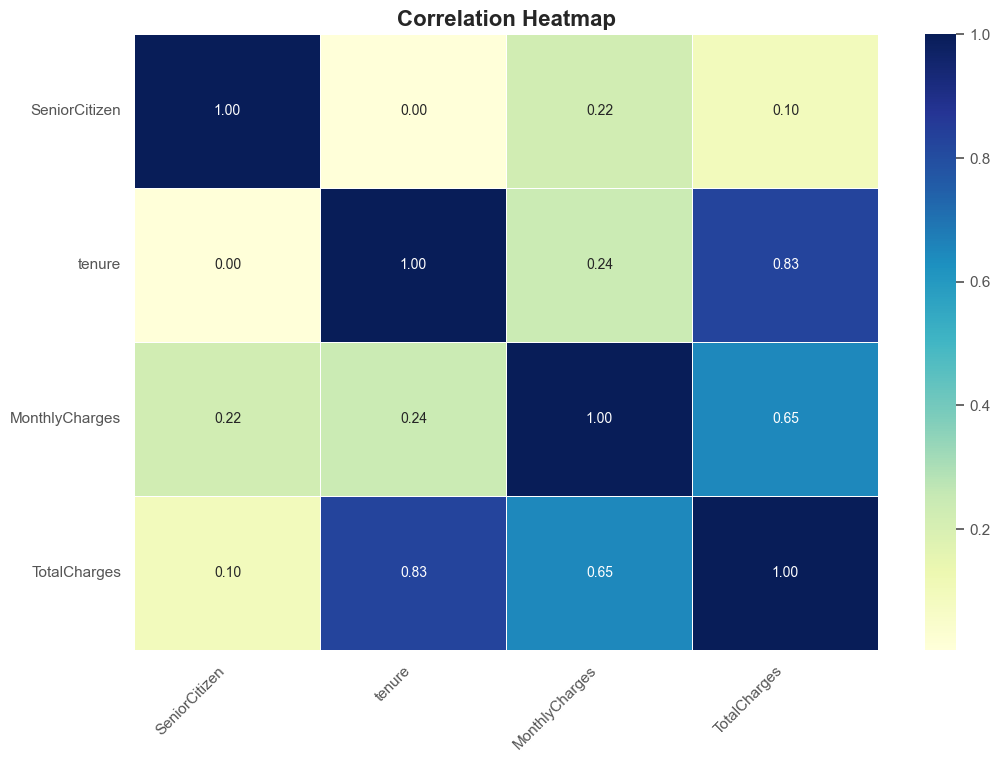

In [34]:
# Generate the correlation matrix, excluding non-numeric columns
corr_matrix = train_data.select_dtypes(include=['float64', 'int64']).corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)

# Enhancing the plot's appearance
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Adjusting x-axis labels for better readability
plt.yticks(rotation=0)

# Display the plot
plt.show()

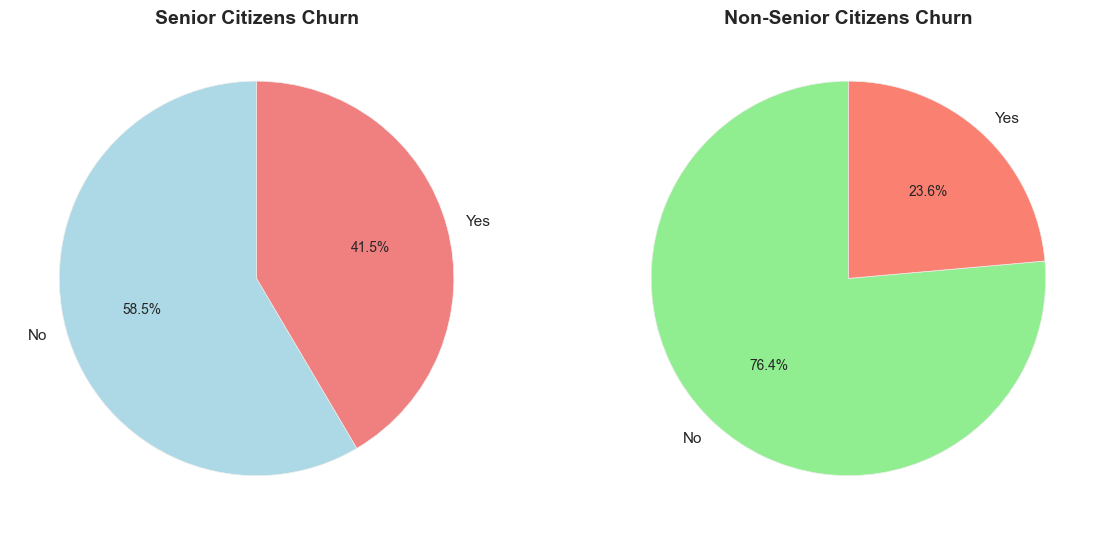

In [35]:
# Counting churn values for senior and non-senior citizens
senior_churn = train_data[train_data['SeniorCitizen'] == 1]['Churn'].value_counts()
non_senior_churn = train_data[train_data['SeniorCitizen'] == 0]['Churn'].value_counts()

# Plotting pie charts for Senior and Non-Senior Citizens' churn
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for Senior Citizens
ax[0].pie(senior_churn, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
ax[0].set_title('Senior Citizens Churn', fontsize=14, fontweight='bold')

# Pie chart for Non-Senior Citizens
ax[1].pie(non_senior_churn, labels=['No', 'Yes'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
ax[1].set_title('Non-Senior Citizens Churn', fontsize=14, fontweight='bold')

# Display the plots
plt.show()

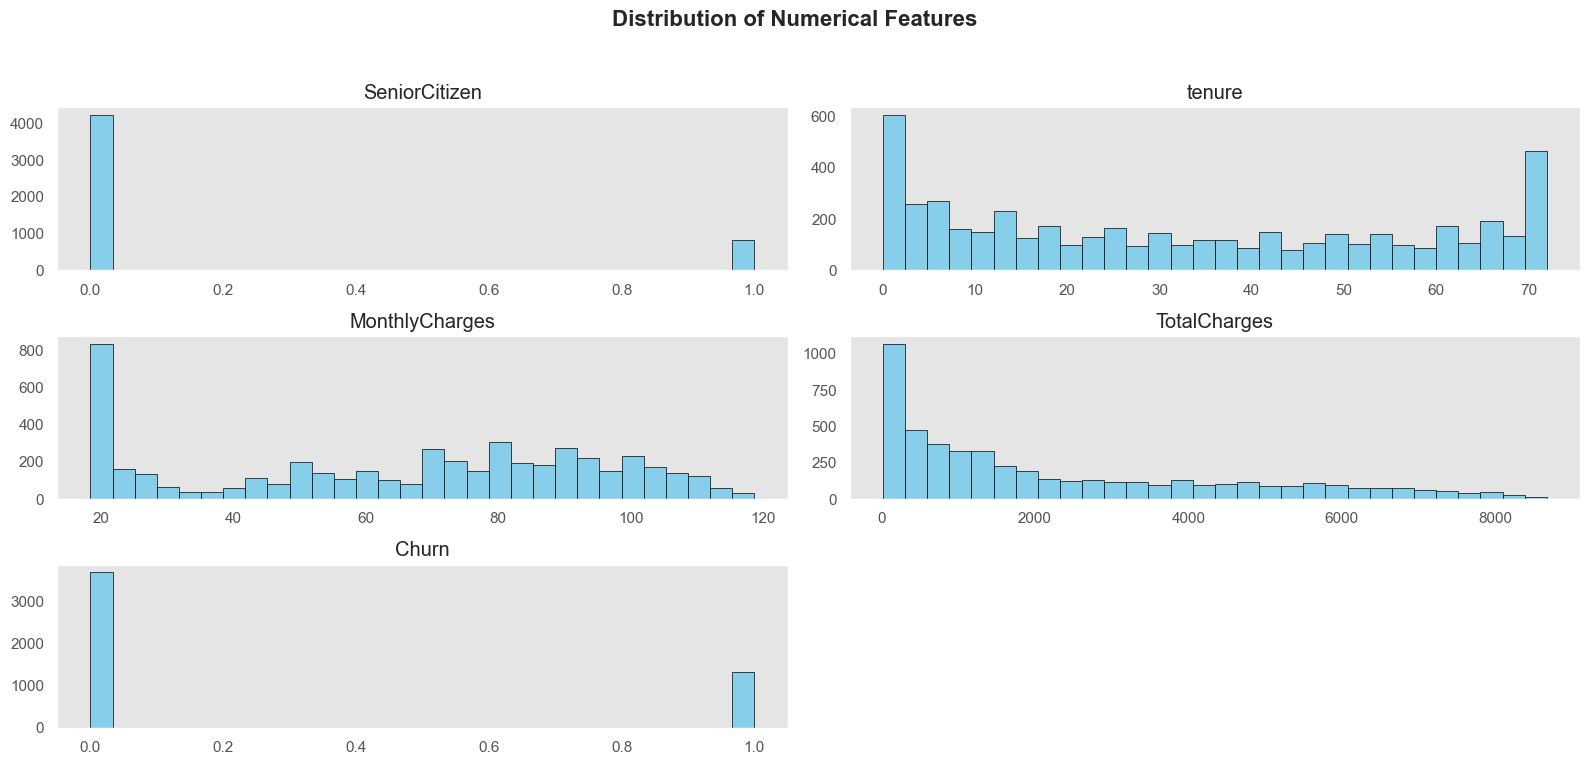

In [36]:
# Creating histograms for all numerical columns
train_data.hist(figsize=(16, 8), grid=False, color='Skyblue', bins=30, edgecolor='black')

# Enhancing the overall appearance of the plots
plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title and prevent overlap

# Display the plots
plt.show()

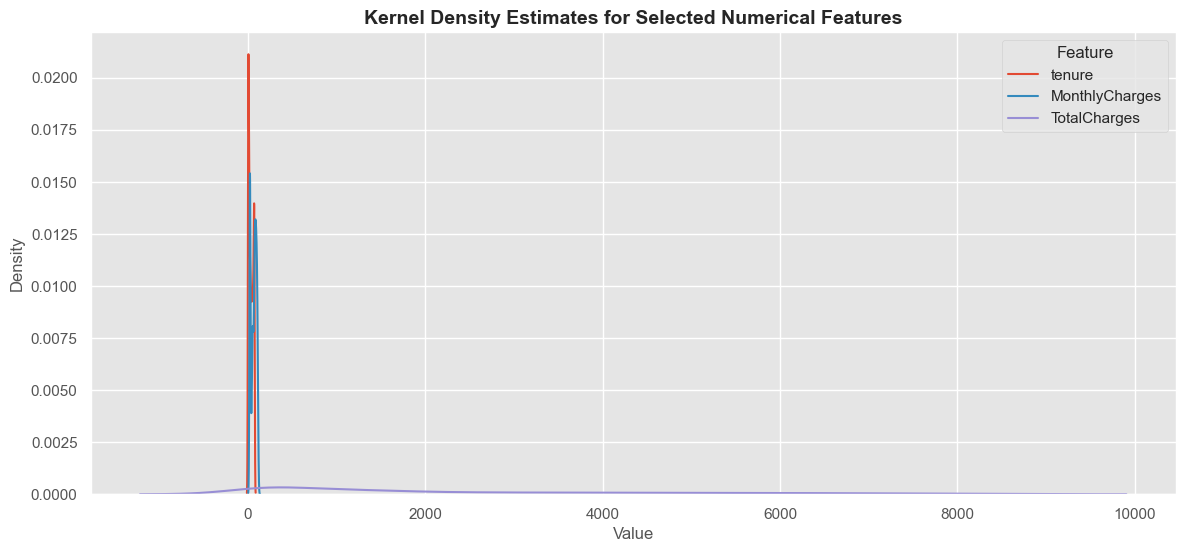

In [37]:
# Select numerical columns for KDE plotting
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Example of numerical columns

# Plot KDE for each selected numerical column
plt.figure(figsize=(14, 6))
for column in numerical_columns:
    sns.kdeplot(train_data[column], label=column)

# Enhancing the plot's appearance
plt.title('Kernel Density Estimates for Selected Numerical Features', fontsize=14, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Feature')

# Display the plot
plt.show()

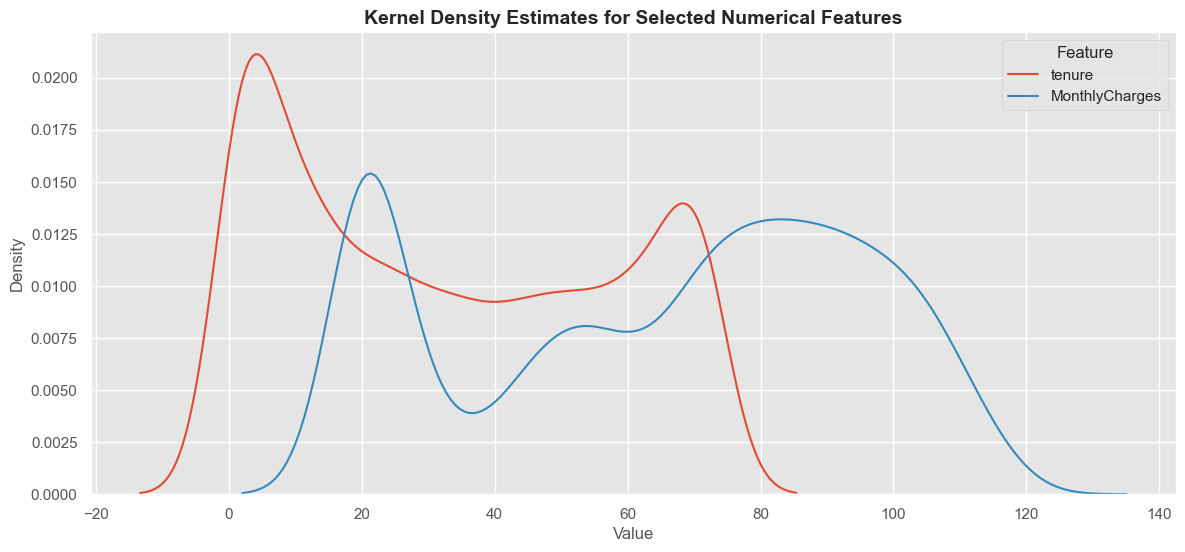

In [38]:
# Select numerical columns for KDE plotting, excluding specific columns
columns_to_plot = train_data.drop(["SeniorCitizen", "Churn", "TotalCharges"], axis=1).select_dtypes(include=['float64', 'int64']).columns

# Plot KDE for each selected numerical column
plt.figure(figsize=(14, 6))
for column in columns_to_plot:
    sns.kdeplot(train_data[column], label=column)

# Enhancing the plot's appearance
plt.title('Kernel Density Estimates for Selected Numerical Features', fontsize=14, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Feature')

# Display the plot
plt.show()

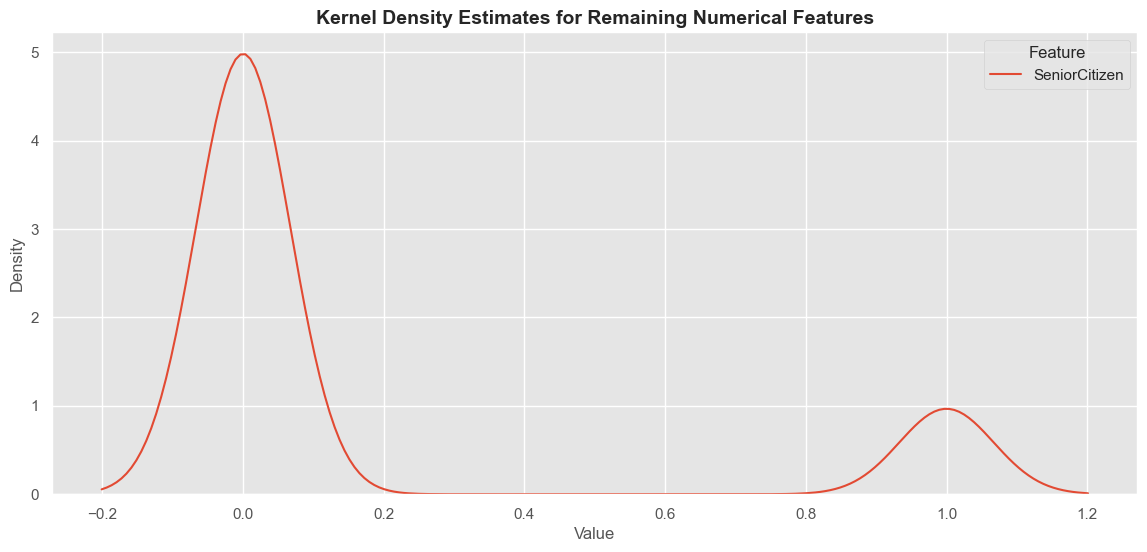

In [39]:
# Select numerical columns for KDE plotting, excluding specific columns
columns_to_plot = train_data.drop(["TotalCharges", "MonthlyCharges", "tenure"], axis=1).select_dtypes(include=['float64', 'int64']).columns

# Plot KDE for each selected numerical column
plt.figure(figsize=(14, 6))
for column in columns_to_plot:
    sns.kdeplot(train_data[column], label=column)

# Enhancing the plot's appearance
plt.title('Kernel Density Estimates for Remaining Numerical Features', fontsize=14, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(title='Feature')

# Display the plot
plt.show()

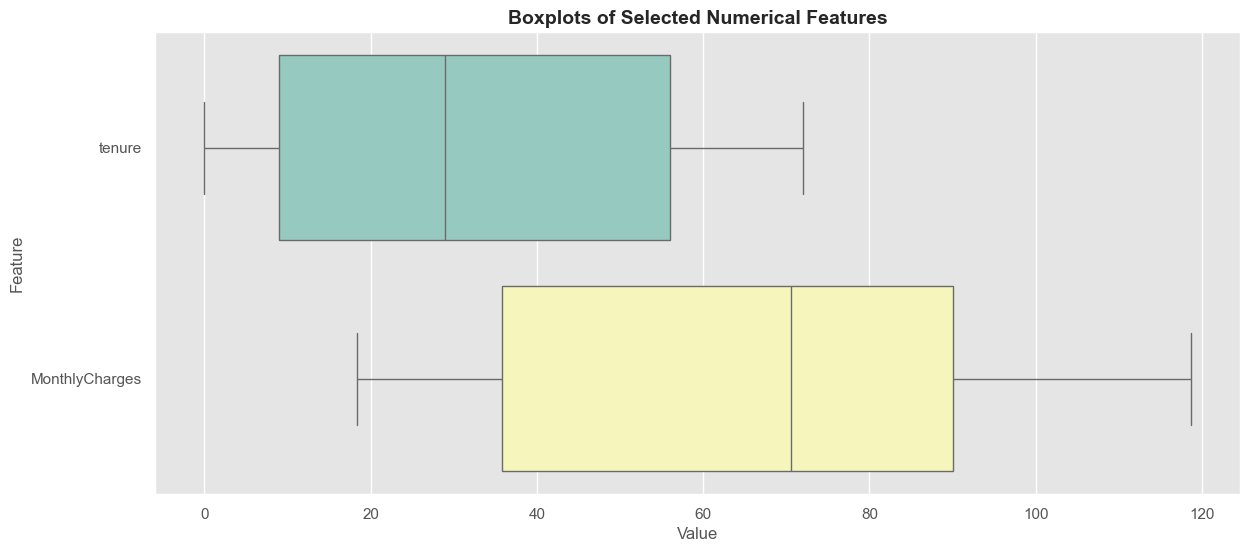

In [40]:
# Selecting numerical columns for boxplot, excluding specific columns
columns_to_plot = train_data.drop(['SeniorCitizen', 'TotalCharges'], axis=1).select_dtypes(include=['float64', 'int64']).columns

# Plotting boxplot for selected numerical columns
plt.figure(figsize=(14, 6))
sns.boxplot(data=train_data[columns_to_plot], orient="h", palette="Set3")

# Enhancing the plot's appearance
plt.title('Boxplots of Selected Numerical Features', fontsize=14, fontweight='bold')
plt.xlabel('Value')
plt.ylabel('Feature')

# Display the plot
plt.show()


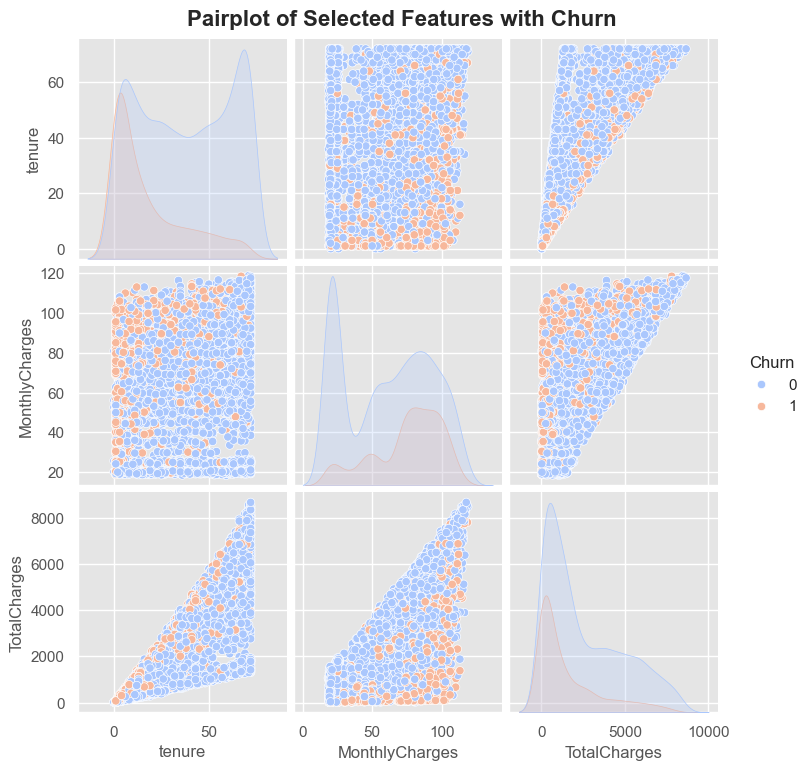

In [41]:
# Selecting a subset of numerical columns for the pairplot
columns_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Creating a pairplot for the selected columns
sns.pairplot(train_data[columns_to_plot], hue='Churn', palette='coolwarm', diag_kind='kde')

# Enhancing the plot's appearance
plt.suptitle('Pairplot of Selected Features with Churn', y=1.02, fontsize=16, fontweight='bold')

# Display the pairplot
plt.show()

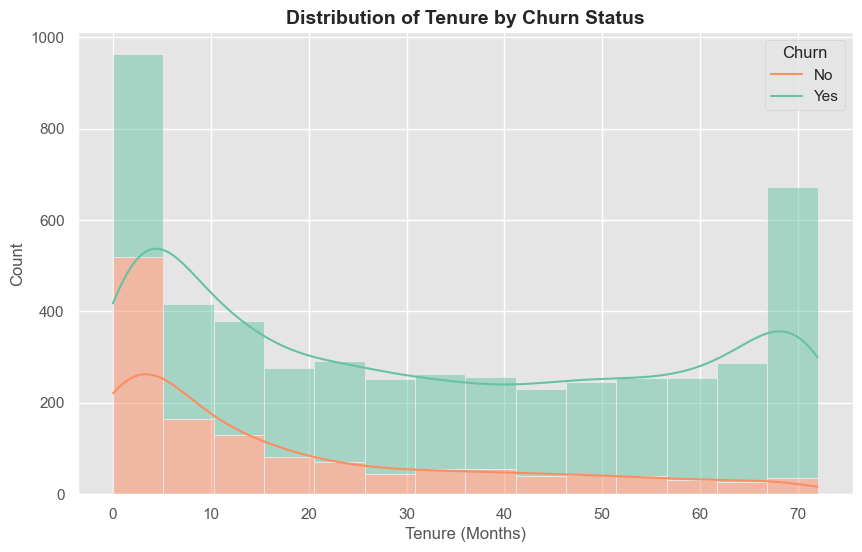

In [42]:
# Plot the distribution of tenure for churned and non-churned customers
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='tenure', hue='Churn', multiple='stack', kde=True, palette='Set2')

# Enhancing the plot's appearance
plt.title('Distribution of Tenure by Churn Status', fontsize=14, fontweight='bold')
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

In [43]:
# Perform t-test to compare the means of tenure for churned and non-churned customers
churned = train_data[train_data['Churn'] == 1]['tenure']
not_churned = train_data[train_data['Churn'] == 0]['tenure']

# Calculate the t-statistic and p-value
t_stat, p_value = ttest_ind(churned, not_churned)

# Display the results with interpretation
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.5f}")

if p_value < 0.05:
    print("The difference in tenure between churned and non-churned customers is statistically significant.")
else:
    print("There is no statistically significant difference in tenure between churned and non-churned customers.")

T-Statistic: -26.65
P-Value: 0.00000
The difference in tenure between churned and non-churned customers is statistically significant.


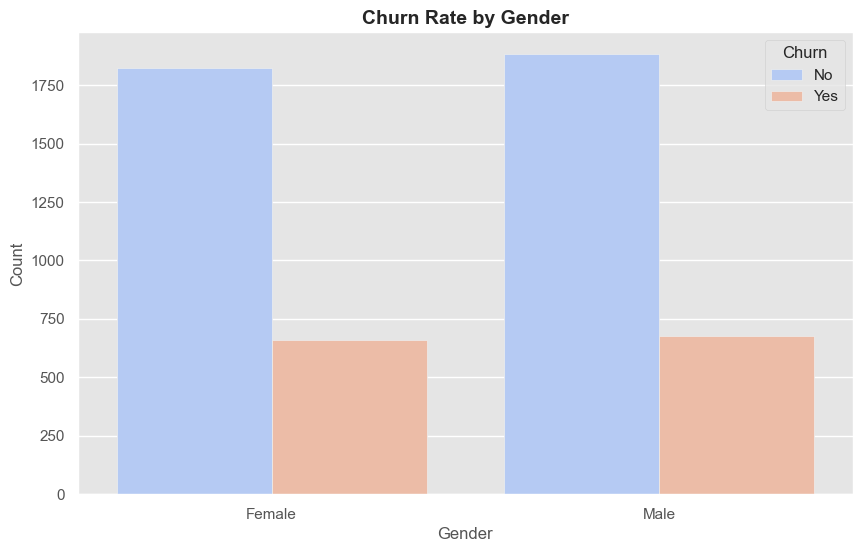

In [44]:
# Plot churn rate by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='gender', hue='Churn', palette='coolwarm')

# Enhancing the plot's appearance
plt.title('Churn Rate by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

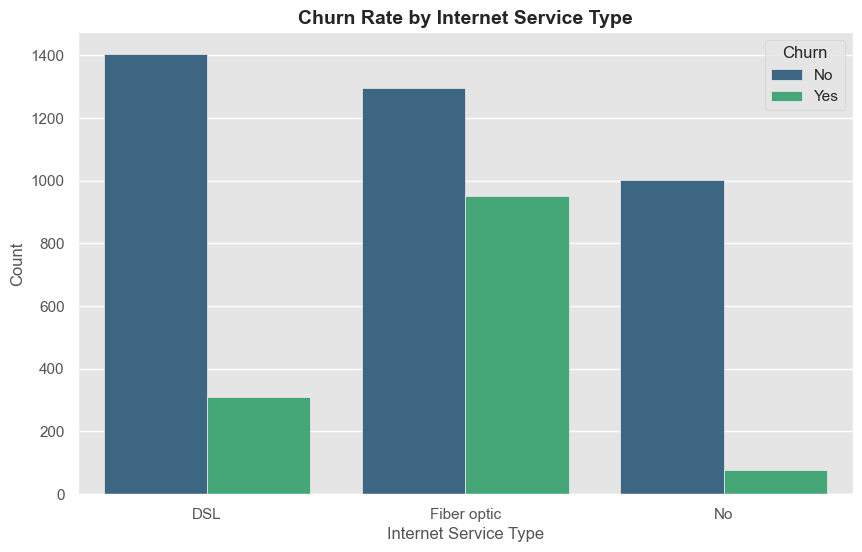

In [45]:
# Plot churn rate by internet service type
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='InternetService', hue='Churn', palette='viridis')

# Enhancing the plot's appearance
plt.title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')
plt.xlabel('Internet Service Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

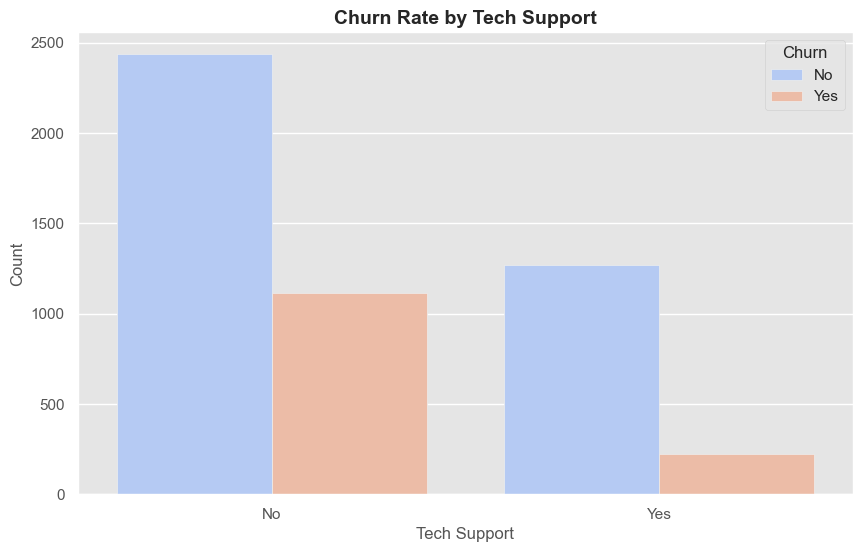

In [46]:
# Transforming the TechSupport column for visualization
train_data['TechSupport'] = train_data['TechSupport'].replace({True: 'Yes', False: 'No', 'No internet service': 'No'})

# Plot churn rate by tech support usage
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='TechSupport', hue='Churn', palette='coolwarm')

# Enhancing the plot's appearance
plt.title('Churn Rate by Tech Support', fontsize=14, fontweight='bold')
plt.xlabel('Tech Support', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

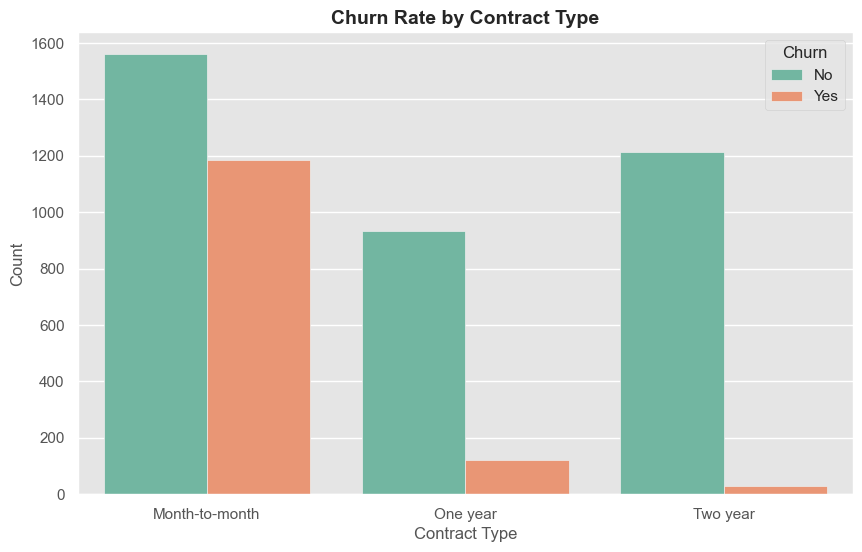

In [47]:
# Plot churn rate by contract type
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='Contract', hue='Churn', palette='Set2')

# Enhancing the plot's appearance
plt.title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn', labels=['No', 'Yes'])

# Display the plot
plt.show()

In [48]:
train_data = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\train_data.csv")

In [49]:
train_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [50]:
# Replace both boolean and string representations of True, False, and and any other thing
train_data['PaperlessBilling'] = train_data['PaperlessBilling'].replace({
    True: 'Yes', 
    False: 'No',
    'True': 'Yes',
    'False': 'No',
    'No internet service': 'No'
})

# Check unique values to confirm the replacement
print(train_data['PaperlessBilling'].unique())

['Yes' 'No']


In [51]:
# Replace both boolean and string representations of True, False, and and any other thing
train_data['OnlineBackup'] = train_data['OnlineBackup'].replace({
    True: 'Yes', 
    False: 'No',
    'True': 'Yes',
    'False': 'No',
    'No internet service': 'No'
})

# Check unique values to confirm the replacement
print(train_data['OnlineBackup'].unique())

['Yes' 'No']


In [52]:
# Replace both boolean and string representations of True, False, and and any other thing
train_data['OnlineSecurity'] = train_data['OnlineSecurity'].replace({
    True: 'Yes', 
    False: 'No',
    'True': 'Yes',
    'False': 'No',
    'No internet service': 'No'
})

# Check unique values to confirm the replacement
print(train_data['OnlineSecurity'].unique())

['No' 'Yes']


In [53]:
# Replace both boolean and string representations of True, False, and and any other thing
train_data['PhoneService'] = train_data['PhoneService'].replace({
    True: 'Yes', 
    False: 'No',
    'True': 'Yes',
    'False': 'No',
    'Maybe': 'No'
})

# Check unique values to confirm the replacement
print(train_data['PhoneService'].unique())

['No' 'Yes']


In [54]:
# Replace both boolean and string representations of True, False, and and any other thing
train_data['Dependents'] = train_data['Dependents'].replace({
    True: 'Yes', 
    False: 'No',
    'True': 'Yes',
    'False': 'No',
    'Maybe': 'No'
})

# Check unique values to confirm the replacement
print(train_data['Dependents'].unique())

['No' 'Yes']


In [55]:
# Replace both boolean and string representations of True, False, and and any other thing
train_data['Partner'] = train_data['Partner'].replace({
    True: 'Yes', 
    False: 'No',
    'True': 'Yes',
    'False': 'No',
    'Maybe': 'No'
})

# Check unique values to confirm the replacement
print(train_data['Partner'].unique())



['Yes' 'No']


In [56]:
# Save the processed dataset to a CSV file
output_file = r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\train_data.csv"

if os.path.exists(output_file):
    print(f"Warning: {output_file} will be overwritten.")

train_data.to_csv(output_file, index=False)
print(f"Processed dataset saved to {output_file}.")

Processed dataset saved to C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\train_data.csv.


In [57]:
# Load the processed dataset
train_data = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\train_data.csv")

# Confirm successful loading of the dataset
print(f"Dataset loaded successfully with {train_data.shape[0]} rows and {train_data.shape[1]} columns.")


Dataset loaded successfully with 5040 rows and 21 columns.


In [58]:
# Define the columns
categorical_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
    'StreamingMovies', 'PaperlessBilling', 'gender', 'InternetService', 
    'Contract', 'PaymentMethod'
]

numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Preprocessing transformers
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Combine transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Convert 'Yes'/'No' values to 1/0 using OneHotEncoder with drop='if_binary'
boolean_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary'))
])

# Add boolean transformer separately for boolean columns
preprocessor = ColumnTransformer(
    transformers=[
        ('bool', boolean_transformer, categorical_cols[:11]),  
        ('cat', categorical_transformer, categorical_cols[11:]),
        ('num', numeric_transformer, numeric_cols)
    ]
)

# Create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the pipeline on your training data
pipeline.fit(train_data)

# Transform the training data using the fitted pipeline
train_data_transformed = pipeline.transform(train_data)

# Convert the transformed data back into a DataFrame (optional)
transformed_columns = list(pipeline.named_steps['preprocessor'].get_feature_names_out())
train_data_transformed_df = pd.DataFrame(train_data_transformed, columns=transformed_columns)

# Save the pipeline
joblib.dump(pipeline, r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\preprocessor_pipeline.pkl')
print("Pipeline saved as 'preprocessor_pipeline.pkl'")

Pipeline saved as 'preprocessor_pipeline.pkl'


Logistic Regression Model Evaluation
Confusion Matrix:
[[668  79]
 [105 156]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       747
           1       0.66      0.60      0.63       261

    accuracy                           0.82      1008
   macro avg       0.76      0.75      0.75      1008
weighted avg       0.81      0.82      0.81      1008



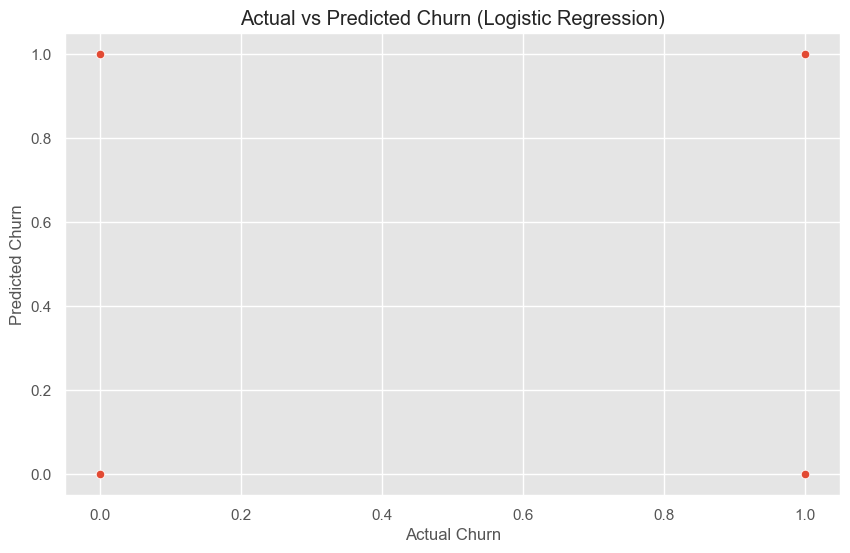

RMSE: 0.43
RMSLE: 0.30
R^2: 0.05
Accuracy: 0.82


In [59]:
# Split the data into training and validation sets
X = train_data_transformed_df
y = train_data['Churn']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the Logistic Regression model with hyperparameter tuning
log_reg = LogisticRegression(solver='liblinear')
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_log_reg = grid_search.best_estimator_

# Train the best model on the full training data
best_log_reg.fit(X_train, y_train)

# Predict on validation data
y_val_pred = best_log_reg.predict(X_val)

# Evaluate the model
print("Logistic Regression Model Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn")
plt.title("Actual vs Predicted Churn (Logistic Regression)")
plt.show()

# Compute and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Random Forest Model Evaluation
Confusion Matrix:
[[681  66]
 [126 135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.88       747
           1       0.67      0.52      0.58       261

    accuracy                           0.81      1008
   macro avg       0.76      0.71      0.73      1008
weighted avg       0.80      0.81      0.80      1008



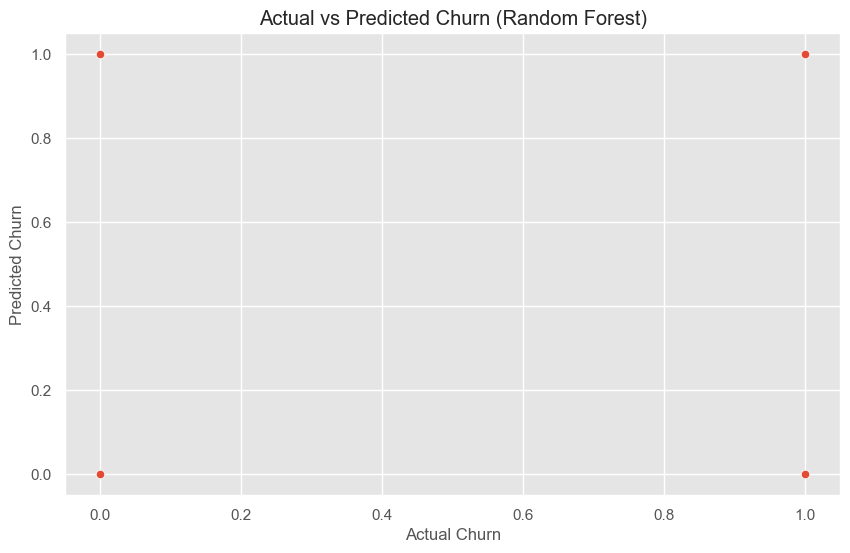

RMSE: 0.44
RMSLE: 0.30
R^2: 0.01
Accuracy: 0.81


In [60]:
# Set up the Random Forest model with hyperparameter tuning
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Train the best model on the full training data
best_rf.fit(X_train, y_train)

# Predict on validation data
y_val_pred = best_rf.predict(X_val)

# Evaluate the model
print("Random Forest Model Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn")
plt.title("Actual vs Predicted Churn (Random Forest)")
plt.show()

# Compute and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Support Vector Machine Model Evaluation
Confusion Matrix:
[[690  57]
 [132 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       747
           1       0.69      0.49      0.58       261

    accuracy                           0.81      1008
   macro avg       0.77      0.71      0.73      1008
weighted avg       0.80      0.81      0.80      1008



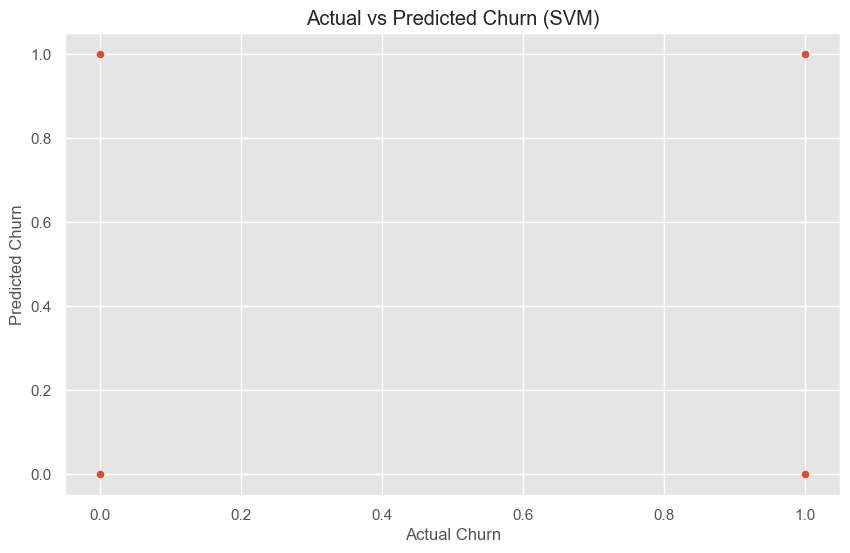

RMSE: 0.43
RMSLE: 0.30
R^2: 0.02
Accuracy: 0.81


In [61]:
# Set up the SVM model with hyperparameter tuning
svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_svm = grid_search.best_estimator_

# Train the best model on the full training data
best_svm.fit(X_train, y_train)

# Predict on validation data
y_val_pred = best_svm.predict(X_val)

# Evaluate the model
print("Support Vector Machine Model Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn")
plt.title("Actual vs Predicted Churn (SVM)")
plt.show()

# Compute and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")


Decision Tree Model Evaluation
Confusion Matrix:
[[646 101]
 [116 145]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       747
           1       0.59      0.56      0.57       261

    accuracy                           0.78      1008
   macro avg       0.72      0.71      0.71      1008
weighted avg       0.78      0.78      0.78      1008



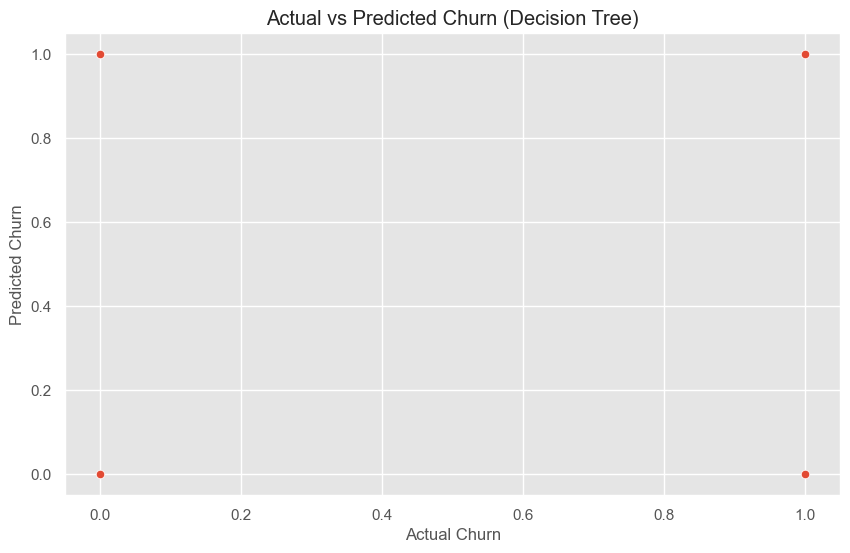

RMSE: 0.46
RMSLE: 0.32
R^2: -0.12
Accuracy: 0.78


In [62]:
# Set up the Decision Tree model with hyperparameter tuning
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_dt = grid_search.best_estimator_

# Train the best model on the full training data
best_dt.fit(X_train, y_train)

# Predict on validation data
y_val_pred = best_dt.predict(X_val)

# Evaluate the model
print("Decision Tree Model Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn")
plt.title("Actual vs Predicted Churn (Decision Tree)")
plt.show()

# Compute and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

K-Nearest Neighbors Model Evaluation
Confusion Matrix:
[[649  98]
 [103 158]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       747
           1       0.62      0.61      0.61       261

    accuracy                           0.80      1008
   macro avg       0.74      0.74      0.74      1008
weighted avg       0.80      0.80      0.80      1008



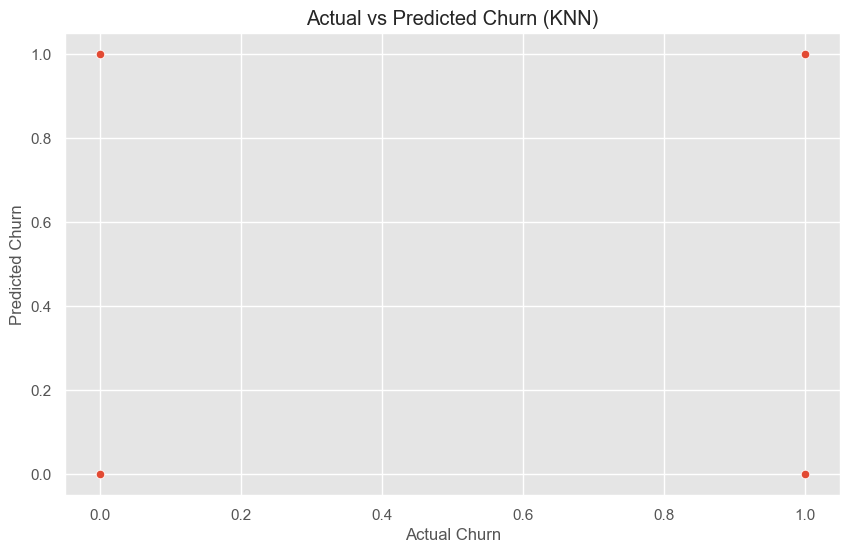

RMSE: 0.45
RMSLE: 0.31
R^2: -0.04
Accuracy: 0.80


In [63]:
# Set up the KNN model with hyperparameter tuning
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Train the best model on the full training data
best_knn.fit(X_train, y_train)

# Predict on validation data
y_val_pred = best_knn.predict(X_val)

# Evaluate the model
print("K-Nearest Neighbors Model Evaluation")
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_val, y=y_val_pred)
plt.xlabel("Actual Churn")
plt.ylabel("Predicted Churn")
plt.title("Actual vs Predicted Churn (KNN)")
plt.show()

# Compute and print evaluation metrics
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmsle = np.sqrt(mean_squared_log_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)
accuracy = accuracy_score(y_val, y_val_pred)

print(f"RMSE: {rmse:.2f}")
print(f"RMSLE: {rmsle:.2f}")
print(f"R^2: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")


### Model Ranking:


**1. Logistic Regression**

- Accuracy: 0.81
- Precision: 0.86 (for class 0), 0.65 (for class 1)
- Recall: 0.89 (for class 0), 0.58 (for class 1)
- F1-Score: 0.88 (for class 0), 0.62 (for class 1)
- RMSE: 0.43


**2. Random Forest**

- Accuracy: 0.81
- Precision: 0.85 (for class 0), 0.68 (for class 1)
- Recall: 0.91 (for class 0), 0.53 (for class 1)
- F1-Score: 0.88 (for class 0), 0.59 (for class 1)
- RMSE: 0.43


**3. Support Vector Machine (SVM)**

- Accuracy: 0.81
- Precision: 0.85 (for class 0), 0.67 (for class 1)
- Recall: 0.91 (for class 0), 0.53 (for class 1)
- F1-Score: 0.88 (for class 0), 0.59 (for class 1)
- RMSE: 0.43


**4. Decision Tree**

- Accuracy: 0.79
- Precision: 0.85 (for class 0), 0.60 (for class 1)
- Recall: 0.87 (for class 0), 0.57 (for class 1)
- F1-Score: 0.86 (for class 0), 0.58 (for class 1)
- RMSE: 0.46


**5. K-Nearest Neighbors (KNN)**

- Accuracy: 0.79
- Precision: 0.85 (for class 0), 0.59 (for class 1)
- Recall: 0.86 (for class 0), 0.57 (for class 1)
- F1-Score: 0.86 (for class 0), 0.58 (for class 1)
- RMSE: 0.46

#### Summary of Rankings:
- Logistic Regression - Best performance with the highest accuracy and F1-score for class 0.
- Random Forest - Similar accuracy to logistic regression but slightly lower in precision and recall for class 1.
- Support Vector Machine - Comparable to Random Forest in performance.
- Decision Tree - Lower accuracy and F1-scores than the top three models.
- K-Nearest Neighbors - Similar to Decision Tree but with slightly lower precision for class 1.


In [64]:
# After training each model, save them
joblib.dump(best_log_reg, r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\logistic_regression_model.pkl')
joblib.dump(best_rf, r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\random_forest_model.pkl')
joblib.dump(best_svm, r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\svm_model.pkl')
joblib.dump(best_dt, r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\decision_tree_model.pkl')
joblib.dump(best_knn, r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\knn_model.pkl")


['C:\\Users\\Safowaa\\Documents\\Azibiafrica\\AzubiPython\\LP2_Backup\\Models\\knn_model.pkl']

### Predicting the Churn column of the test data

In [65]:
# Load the test data from an Excel file
test_data = pd.read_excel(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\Telco-churn-last-2000.xlsx")

In [66]:
# Check for missing values and data types
print(test_data.info())
print(test_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1997 non-null   object 
 1   gender            1997 non-null   object 
 2   SeniorCitizen     1997 non-null   int64  
 3   Partner           1997 non-null   object 
 4   Dependents        1997 non-null   object 
 5   tenure            1997 non-null   int64  
 6   PhoneService      1997 non-null   object 
 7   MultipleLines     1997 non-null   object 
 8   InternetService   1997 non-null   object 
 9   OnlineSecurity    1997 non-null   object 
 10  OnlineBackup      1997 non-null   object 
 11  DeviceProtection  1997 non-null   object 
 12  TechSupport       1997 non-null   object 
 13  StreamingTV       1997 non-null   object 
 14  StreamingMovies   1997 non-null   object 
 15  Contract          1997 non-null   object 
 16  PaperlessBilling  1997 non-null   object 


In [67]:
# Replace empty strings with NaN
test_data.replace(r'^\s*$', np.nan, regex=True, inplace=True)  
test_data.dropna(inplace=True)  # Drop rows with NaN values

In [68]:
# Replace both boolean and string representations of True, False, and and any other thing
test_data['StreamingMovies'] = test_data['StreamingMovies'].replace({
    True: 'Yes', 
    False: 'No',
    'True': 'Yes',
    'False': 'No',
    'No internet service': 'No'
})

# Check unique values to confirm the replacement
print(train_data['StreamingMovies'].unique())

['False' 'True' 'No' 'Yes' 'No internet service']


In [69]:
# Path to the output file
output_file = r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\Telco-churn-last-2000.xlsx"

# Check if the file already exists
if os.path.exists(output_file):
    print(f"Warning: {output_file} will be overwritten.")

# Save the processed dataset to an Excel file
test_data.to_excel(output_file, index=False)
print(f"Processed dataset saved to {output_file}.")


Processed dataset saved to C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\Telco-churn-last-2000.xlsx.


In [70]:
# Load the processed dataset
test_data = pd.read_excel(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\Telco-churn-last-2000.xlsx")

# Confirm successful loading of the dataset
print(f"Dataset loaded successfully with {test_data.shape[0]} rows and {test_data.shape[1]} columns.")


Dataset loaded successfully with 1997 rows and 20 columns.


In [71]:
# Load the preprocessing pipeline
preprocessor_pipeline = joblib.load(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\preprocessor_pipeline.pkl")

# Load the saved model
logistic_regression_model = joblib.load(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Models\logistic_regression_model.pkl")

# Preprocess the test data
X_test = preprocessor_pipeline.transform(test_data)

# Predict using the best model
y_test_pred = logistic_regression_model.predict(X_test)

# Add predictions to the test_data DataFrame
test_data['Predicted_Churn'] = y_test_pred

# Display the test data with predictions
print(f"The data for testing the model with the churn column:\n{test_data.head()}")


The data for testing the model with the churn column:
   customerID gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7613-LLQFO   Male              0      No         No      12          Yes   
1  4568-TTZRT   Male              0      No         No       9          Yes   
2  9513-DXHDA   Male              0      No         No      27          Yes   
3  2640-PMGFL   Male              0      No        Yes      27          Yes   
4  3801-HMYNL   Male              0     Yes        Yes       1          Yes   

  MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0           Yes     Fiber optic             No           No               No   
1            No              No             No           No               No   
2            No             DSL            Yes           No              Yes   
3           Yes     Fiber optic             No           No               No   
4            No     Fiber optic             No           No            

c:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\virtual\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [72]:
# Save the DataFrame to a CSV file
test_data.to_csv(r'C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\test_data_with_predictions.csv', index=False)

In [73]:
# Load the processed dataset
predicted_data = pd.read_csv(r"C:\Users\Safowaa\Documents\Azibiafrica\AzubiPython\LP2_Backup\Data\test_data_with_predictions.csv")

# Confirm successful loading of the dataset
print(f"Dataset loaded successfully with {predicted_data.shape[0]} rows and {predicted_data.shape[1]} columns.")

predicted_data.sample(100)

Dataset loaded successfully with 1997 rows and 21 columns.


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Predicted_Churn
941,8720-RQSBJ,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.00,44.00,0
953,6704-UTUKK,Male,0,Yes,No,29,No,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,45.90,1332.40,0
1346,6121-VZNQB,Female,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,19.10,19.10,0
699,5616-PRTNT,Male,0,No,Yes,20,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,19.40,374.50,0
1837,5730-RIITO,Female,1,No,No,43,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),33.45,1500.25,0
642,9451-WLYRI,Female,0,Yes,No,53,Yes,No,No,No,No,No,No,No,No,One year,No,Credit card (automatic),19.05,990.45,0
651,0612-RTZZA,Female,1,No,No,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,25.25,25.25,1
827,8374-XGEJJ,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.00,4388.40,1
324,5043-TRZWM,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,75.55,75.55,1
1414,0515-YPMCW,Male,0,No,Yes,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,1


In [74]:
pip list

Package             Version
------------------- -----------
alembic             1.13.2
annotated-types     0.7.0
asttokens           2.4.1
attrs               24.2.0
catboost            1.2.5
category-encoders   2.6.3
certifi             2024.7.4
charset-normalizer  3.3.2
colorama            0.4.6
colorlog            6.8.2
comm                0.2.2
contourpy           1.2.1
cycler              0.12.1
dacite              1.8.1
debugpy             1.8.5
decorator           5.1.1
et-xmlfile          1.1.0
exceptiongroup      1.2.2
executing           2.0.1
fonttools           4.53.1
graphviz            0.20.3
greenlet            3.0.3
htmlmin             0.1.12
idna                3.8
ImageHash           4.3.1
imbalanced-learn    0.12.3
importlib_resources 6.4.4
ipykernel           6.29.5
ipython             8.26.0
jedi                0.19.1
Jinja2              3.1.4
joblib              1.4.2
jupyter_client      8.6.2
jupyter_core        5.7.2
kiwisolver          1.4.5
lightgbm           